# Classificação ABC para itens de MRO usando aprendizado de máquina

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix


## Exploração dos dados

### Base de dados

In [2]:
df_tcc = pd.read_excel('BD_TCC.xlsx', sheet_name='BD_Analista')
df_tcc

,Loja,Familia,Tipo de Consumo,Lead Time,Consumo Médio Anual,Preço Médio,ABC
0,5,MAT ELETRICO,CONSUMO MEDIO,40,12.333333,4.9533,A
1,5,VEDACAO,CONSUMO MEDIO,30,584.666667,8.2675,B
2,5,PARAFUSOS,CONSUMO MEDIO,30,59.666667,3.0400,C
3,1,MAT MECANICO,CONSUMO MEDIO,40,1.000000,26.4200,B
4,10,LUBRIFICANTES,CONSUMO MEDIO,30,56.666667,84.2033,A
...,...,...,...,...,...,...,...
395,1,MAT MECANICO,CONSUMO MEDIO,30,118.000000,58.8000,A
396,5,MAT EXPEDIENTE,CONSUMO MEDIO,30,1666.666667,0.4000,C
397,5,MAT EXPEDIENTE,CONSUMO MEDIO,30,34.666667,4.9625,C
398,1,IMPORTADOS,CONSUMO MEDIO,99,3.666667,955.6300,A


In [3]:
df_tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loja                 400 non-null    int64  
 1   Familia              400 non-null    object 
 2   Tipo de Consumo      400 non-null    object 
 3   Lead Time            400 non-null    int64  
 4   Consumo Médio Anual  400 non-null    float64
 5   Preço Médio          400 non-null    float64
 6   ABC                  400 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 22.0+ KB


In [4]:
df_tcc.drop(['Loja', 'Tipo de Consumo', 'Lead Time'], axis=1, inplace=True)
df_tcc

,Familia,Consumo Médio Anual,Preço Médio,ABC
0,MAT ELETRICO,12.333333,4.9533,A
1,VEDACAO,584.666667,8.2675,B
2,PARAFUSOS,59.666667,3.0400,C
3,MAT MECANICO,1.000000,26.4200,B
4,LUBRIFICANTES,56.666667,84.2033,A
...,...,...,...,...
395,MAT MECANICO,118.000000,58.8000,A
396,MAT EXPEDIENTE,1666.666667,0.4000,C
397,MAT EXPEDIENTE,34.666667,4.9625,C
398,IMPORTADOS,3.666667,955.6300,A


In [5]:
df_tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Familia              400 non-null    object 
 1   Consumo Médio Anual  400 non-null    float64
 2   Preço Médio          400 non-null    float64
 3   ABC                  400 non-null    object 
dtypes: float64(2), object(2)
memory usage: 12.6+ KB


### Visualização

In [6]:
np.unique(df_tcc['ABC'], return_counts=True)

(array(['A', 'B', 'C'], dtype=object), array([172,  81, 147], dtype=int64))

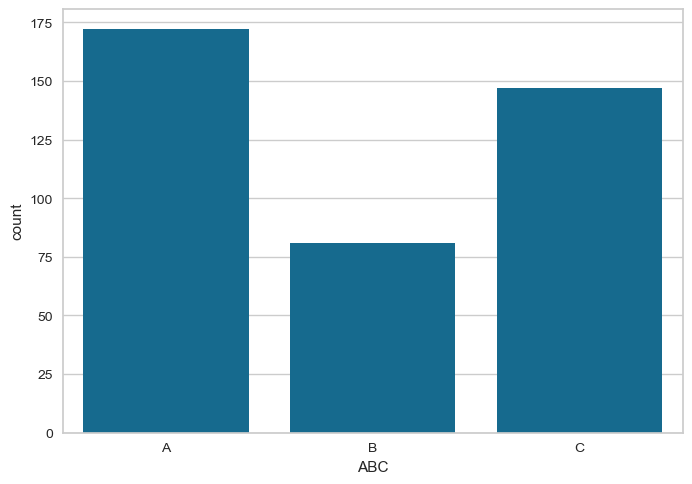

In [7]:
sns.countplot(x=df_tcc['ABC']);

In [8]:
grafico = px.treemap(df_tcc, path=['Familia', 'Consumo Médio Anual'])
grafico.show()

### Previsores x Classe

In [9]:
x_classe = df_tcc.iloc[:, 0:3].values
x_classe

array([['MAT ELETRICO', 12.33333333333333, 4.9533],
       ['VEDACAO', 584.6666666666666, 8.2675],
       ['PARAFUSOS', 59.66666666666667, 3.04],
       ...,
       ['MAT EXPEDIENTE', 34.66666666666666, 4.9625],
       ['IMPORTADOS', 3.666666666666667, 955.63],
       ['HIDRAULICO', 2.5, 69.87]], dtype=object)

In [10]:
x_classe[0]

array(['MAT ELETRICO', 12.33333333333333, 4.9533], dtype=object)

In [11]:
y_classe = df_tcc.iloc[:, 3].values
y_classe

array(['A', 'B', 'C', 'B', 'A', 'A', 'C', 'C', 'C', 'A', 'C', 'B', 'C',
       'A', 'A', 'B', 'C', 'B', 'B', 'B', 'A', 'C', 'C', 'B', 'C', 'B',
       'C', 'A', 'A', 'B', 'C', 'B', 'A', 'C', 'C', 'C', 'C', 'B', 'C',
       'A', 'A', 'C', 'C', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'A', 'C',
       'A', 'A', 'C', 'A', 'B', 'A', 'C', 'C', 'A', 'C', 'A', 'C', 'C',
       'B', 'C', 'B', 'B', 'A', 'B', 'C', 'A', 'C', 'B', 'A', 'C', 'C',
       'A', 'B', 'C', 'B', 'B', 'C', 'C', 'B', 'A', 'C', 'C', 'A', 'B',
       'C', 'B', 'C', 'C', 'A', 'B', 'C', 'B', 'C', 'C', 'A', 'B', 'B',
       'C', 'C', 'C', 'A', 'A', 'B', 'C', 'B', 'C', 'C', 'B', 'C', 'A',
       'C', 'A', 'B', 'B', 'A', 'C', 'A', 'C', 'C', 'B', 'C', 'A', 'A',
       'B', 'C', 'C', 'A', 'B', 'A', 'C', 'A', 'C', 'C', 'B', 'B', 'B',
       'B', 'B', 'C', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'C', 'B', 'A',
       'A', 'B', 'A', 'A', 'B', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'C',
       'A', 'C', 'C', 'B', 'B', 'A', 'C', 'A', 'C', 'C', 'A', 'A

### Tratamento de atributos categóricos

In [12]:
label_encoder_teste = LabelEncoder()
teste = label_encoder_teste.fit_transform(x_classe[:, 0])
print(x_classe[:, 0])
print(teste)

['MAT ELETRICO' 'VEDACAO' 'PARAFUSOS' 'MAT MECANICO' 'LUBRIFICANTES'
 'IMPORTADOS' 'DISJUNTORES' 'PORCA ARRUELA' 'MAT EXPEDIENTE' 'SENSORES'
 'FERRAGENS' 'ELETRODOS' 'FARDAMENTO' 'CONF DESENHO' 'EPI' 'HIDRAULICO'
 'CONEXOES' 'ROLAMENTOS' 'RESISTENCIAS' 'CORRENTES' 'FILTROS' 'FIXACAO'
 'BROCAS' 'VALVULAS' 'LIMPEZA' 'CORREIAS' 'MANGUEIRAS' 'GASES'
 'ESTRATEGICO' 'MANGAS FILTRO' 'PINTURA' 'ESCOVAS' 'ESTEIRAS'
 'PC EMPILHADEIRA' 'MAT CONSTRUCAO' 'HIDRAULICO' 'BROCAS' 'DISJUNTORES'
 'BROCAS' 'MAT ELETRICO' 'CONF DESENHO' 'PARAFUSOS' 'HIDRAULICO'
 'IMPORTADOS' 'PARAFUSOS' 'SENSORES' 'MAT CONSTRUCAO' 'MAT ELETRICO'
 'MAT ELETRICO' 'EPI' 'MAT MECANICO' 'VEDACAO' 'MAT ELETRICO' 'IMPORTADOS'
 'FARDAMENTO' 'SENSORES' 'CORREIAS' 'SENSORES' 'VEDACAO' 'HIDRAULICO'
 'MAT ELETRICO' 'MANGUEIRAS' 'EPI' 'PARAFUSOS' 'MAT EXPEDIENTE'
 'MAT MECANICO' 'FERRAGENS' 'CORREIAS' 'ELETRODOS' 'LUBRIFICANTES'
 'MAT MECANICO' 'PARAFUSOS' 'EPI' 'PARAFUSOS' 'MAT MECANICO'
 'MAT ELETRICO' 'MANGUEIRAS' 'PARAFUSOS' 'MAT E

In [13]:
x_classe[0]

array(['MAT ELETRICO', 12.33333333333333, 4.9533], dtype=object)

In [14]:
#Label Encoder
label_enconder_familia = LabelEncoder()

In [15]:
x_classe[:,0] = label_enconder_familia.fit_transform(x_classe[:,0])

In [16]:
x_classe[0]

array([23, 12.33333333333333, 4.9533], dtype=object)

In [17]:
x_classe

array([[23, 12.33333333333333, 4.9533],
       [34, 584.6666666666666, 8.2675],
       [26, 59.66666666666667, 3.04],
       ...,
       [24, 34.66666666666666, 4.9625],
       [17, 3.666666666666667, 955.63],
       [16, 2.5, 69.87]], dtype=object)

In [18]:
onehotencoder_classe = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(sparse_output=False), [0])], remainder='passthrough')

In [19]:
x_classe = onehotencoder_classe.fit_transform(x_classe)
x_classe

array([[0.0, 0.0, 0.0, ..., 0.0, 12.33333333333333, 4.9533],
       [0.0, 0.0, 0.0, ..., 1.0, 584.6666666666666, 8.2675],
       [0.0, 0.0, 0.0, ..., 0.0, 59.66666666666667, 3.04],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 34.66666666666666, 4.9625],
       [0.0, 0.0, 0.0, ..., 0.0, 3.666666666666667, 955.63],
       [0.0, 0.0, 0.0, ..., 0.0, 2.5, 69.87]], dtype=object)

In [20]:
x_classe[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.33333333333333,
       4.9533], dtype=object)

In [21]:
x_classe.shape #(linhas, colunas)

(400, 37)

### Escalonamento dos valores

In [22]:
scaler_classe = StandardScaler()
x_classe = scaler_classe.fit_transform(x_classe)

In [23]:
x_classe[0]

array([-0.16012815, -0.12340351, -0.21068086, -0.1334605 , -0.14285714,
       -0.08692914, -0.08692914, -0.21068086, -0.10050378, -0.07088812,
       -0.07088812, -0.21707238, -0.10050378, -0.07088812, -0.11250879,
       -0.10050378, -0.2353911 , -0.21707238, -0.11250879, -0.14285714,
       -0.07088812, -0.16012815, -0.08692914,  2.67642771, -0.22331316,
       -0.33333333, -0.33794397, -0.07088812, -0.07088812, -0.17586311,
       -0.1334605 , -0.22941573, -0.17586311, -0.11250879, -0.17586311,
       -0.18943629, -0.33683694])

### Treinamento x Teste

In [24]:
x_classe_treinamento, x_classe_teste, y_classe_treinamento, y_classe_teste = train_test_split(x_classe, y_classe, test_size=0.25, random_state=0)

In [25]:
x_classe_treinamento.shape, y_classe_treinamento.shape

((300, 37), (300,))

In [26]:
x_classe_teste.shape, y_classe_teste.shape

((100, 37), (100,))

### Salvar variáveis

In [27]:
with open('abc.pkl', mode = 'wb') as f:
    pickle.dump([x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste], f)

## Regressão Logística

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [30]:
logistic_classe = LogisticRegression(random_state=1)
logistic_classe.fit(x_classe_treinamento, y_classe_treinamento)

LogisticRegression(random_state=1)

In [31]:
previsoes = logistic_classe.predict(x_classe_teste)
previsoes

array(['C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C',
       'B', 'C', 'C', 'A', 'C', 'A', 'A', 'A', 'B', 'C', 'A', 'C', 'B',
       'A', 'C', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'C', 'B', 'A', 'A',
       'C', 'C', 'C', 'A', 'B', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'B',
       'A', 'C', 'C', 'C', 'A', 'B', 'B', 'A', 'A', 'C', 'A', 'A', 'B',
       'B', 'C', 'A', 'A', 'C', 'C', 'A', 'B', 'A', 'A', 'A', 'C', 'C',
       'B', 'A', 'C', 'C', 'A', 'C', 'A', 'B', 'C', 'C', 'A', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

In [32]:
y_classe_teste

array(['C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'C',
       'B', 'C', 'C', 'A', 'B', 'B', 'A', 'A', 'A', 'C', 'A', 'C', 'B',
       'A', 'B', 'A', 'B', 'C', 'C', 'A', 'A', 'B', 'C', 'B', 'B', 'A',
       'B', 'C', 'B', 'C', 'B', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'B',
       'A', 'C', 'B', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'A', 'B',
       'A', 'C', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'A', 'A', 'C', 'C',
       'C', 'A', 'C', 'C', 'A', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

In [33]:
accuracy_score(y_classe_teste, previsoes)

0.79

0.79

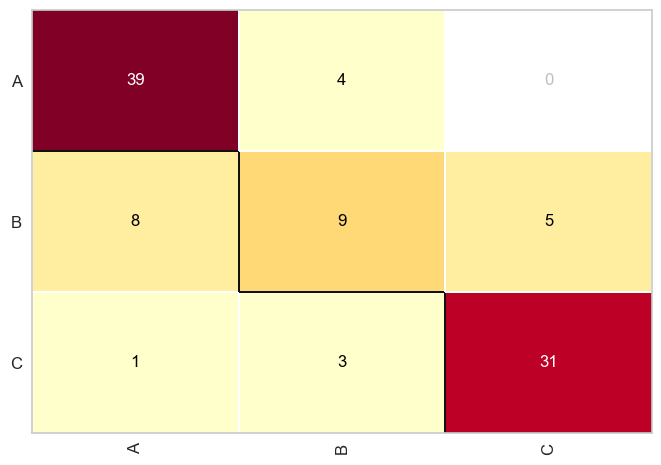

In [34]:
cm =  ConfusionMatrix(logistic_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [35]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.81      0.91      0.86        43
           B       0.56      0.41      0.47        22
           C       0.86      0.89      0.87        35

    accuracy                           0.79       100
   macro avg       0.75      0.73      0.73       100
weighted avg       0.77      0.79      0.78       100



## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

### Treinamento

In [38]:
random_forest_classe = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_classe.fit(x_classe_treinamento, y_classe_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [39]:
previsoes = random_forest_classe.predict(x_classe_teste)
previsoes

array(['B', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'C', 'A', 'C',
       'C', 'C', 'C', 'A', 'B', 'A', 'A', 'A', 'B', 'C', 'A', 'C', 'B',
       'A', 'C', 'A', 'A', 'C', 'C', 'C', 'B', 'A', 'C', 'B', 'A', 'A',
       'C', 'B', 'B', 'A', 'C', 'A', 'B', 'A', 'C', 'A', 'A', 'A', 'A',
       'A', 'C', 'B', 'C', 'A', 'C', 'A', 'A', 'A', 'C', 'A', 'A', 'B',
       'B', 'C', 'A', 'B', 'C', 'C', 'A', 'C', 'A', 'A', 'A', 'C', 'C',
       'C', 'A', 'C', 'C', 'A', 'C', 'A', 'C', 'C', 'C', 'A', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

In [40]:
y_classe_teste

array(['C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'C',
       'B', 'C', 'C', 'A', 'B', 'B', 'A', 'A', 'A', 'C', 'A', 'C', 'B',
       'A', 'B', 'A', 'B', 'C', 'C', 'A', 'A', 'B', 'C', 'B', 'B', 'A',
       'B', 'C', 'B', 'C', 'B', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'B',
       'A', 'C', 'B', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'A', 'B',
       'A', 'C', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'A', 'A', 'C', 'C',
       'C', 'A', 'C', 'C', 'A', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

### Acurácia RF

In [41]:
accuracy_score(y_classe_teste, previsoes)

0.76

0.76

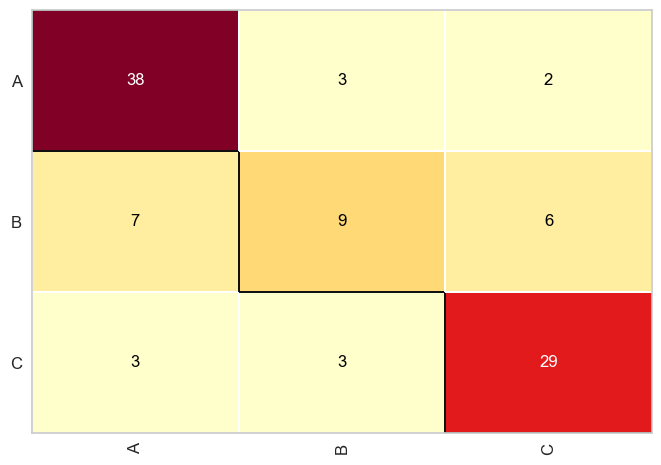

In [42]:
cm = ConfusionMatrix(random_forest_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [43]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.79      0.88      0.84        43
           B       0.60      0.41      0.49        22
           C       0.78      0.83      0.81        35

    accuracy                           0.76       100
   macro avg       0.73      0.71      0.71       100
weighted avg       0.75      0.76      0.75       100



## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

### Treinamento

In [45]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [46]:
knn_classe = KNeighborsClassifier(n_neighbors=5)
knn_classe.fit(x_classe_treinamento, y_classe_treinamento)

KNeighborsClassifier()

In [47]:
previsoes = knn_classe.predict(x_classe_teste)
previsoes

array(['C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'C',
       'A', 'C', 'C', 'B', 'B', 'A', 'A', 'A', 'B', 'C', 'A', 'C', 'A',
       'A', 'C', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'C', 'B', 'A', 'A',
       'C', 'C', 'B', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'B',
       'A', 'C', 'C', 'C', 'A', 'A', 'C', 'A', 'B', 'C', 'A', 'A', 'A',
       'B', 'C', 'A', 'B', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'C', 'C',
       'C', 'A', 'C', 'C', 'A', 'C', 'A', 'A', 'C', 'C', 'B', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

In [48]:
y_classe_teste

array(['C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'C',
       'B', 'C', 'C', 'A', 'B', 'B', 'A', 'A', 'A', 'C', 'A', 'C', 'B',
       'A', 'B', 'A', 'B', 'C', 'C', 'A', 'A', 'B', 'C', 'B', 'B', 'A',
       'B', 'C', 'B', 'C', 'B', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'B',
       'A', 'C', 'B', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'A', 'B',
       'A', 'C', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'A', 'A', 'C', 'C',
       'C', 'A', 'C', 'C', 'A', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

### Acurácia KNN

In [49]:
accuracy_score(y_classe_teste, previsoes)

0.79

0.79

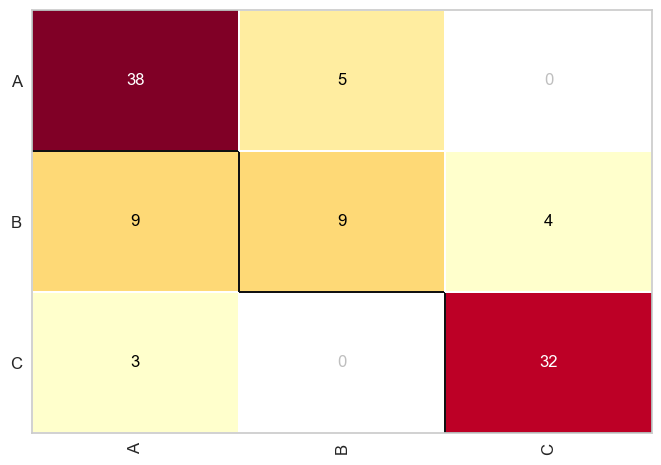

In [50]:
cm =  ConfusionMatrix(knn_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [51]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.76      0.88      0.82        43
           B       0.64      0.41      0.50        22
           C       0.89      0.91      0.90        35

    accuracy                           0.79       100
   macro avg       0.76      0.74      0.74       100
weighted avg       0.78      0.79      0.78       100



## SVM

In [52]:
from sklearn.svm import SVC

In [53]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [54]:
svm_classe = SVC(kernel='poly', random_state=1)
svm_classe.fit(x_classe_treinamento, y_classe_treinamento)

SVC(kernel='poly', random_state=1)

In [55]:
previsoes = svm_classe.predict(x_classe_teste)
previsoes

array(['C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C',
       'C', 'C', 'C', 'A', 'C', 'A', 'A', 'A', 'B', 'C', 'A', 'C', 'B',
       'A', 'C', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'C', 'A', 'A', 'A',
       'C', 'C', 'C', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'A',
       'A', 'C', 'C', 'C', 'A', 'C', 'C', 'A', 'A', 'C', 'A', 'A', 'A',
       'A', 'C', 'A', 'A', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'C', 'C',
       'C', 'A', 'C', 'C', 'A', 'C', 'A', 'B', 'C', 'C', 'A', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

In [56]:
y_classe_teste

array(['C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'C',
       'B', 'C', 'C', 'A', 'B', 'B', 'A', 'A', 'A', 'C', 'A', 'C', 'B',
       'A', 'B', 'A', 'B', 'C', 'C', 'A', 'A', 'B', 'C', 'B', 'B', 'A',
       'B', 'C', 'B', 'C', 'B', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'B',
       'A', 'C', 'B', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'A', 'B',
       'A', 'C', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'A', 'A', 'C', 'C',
       'C', 'A', 'C', 'C', 'A', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

In [57]:
accuracy_score(y_classe_teste, previsoes)

0.77

0.77

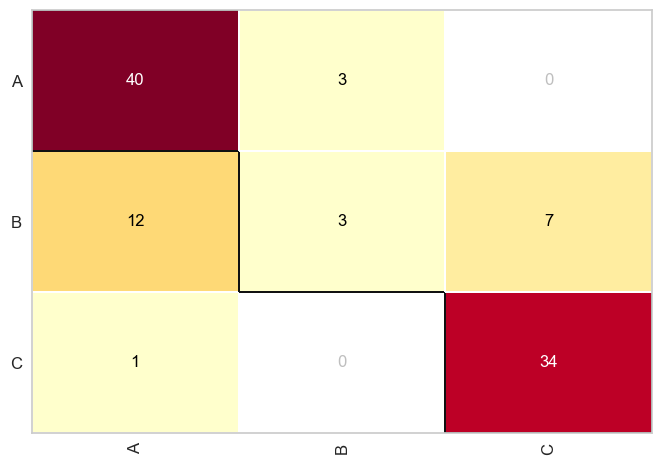

In [58]:
cm =  ConfusionMatrix(svm_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [59]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.75      0.93      0.83        43
           B       0.50      0.14      0.21        22
           C       0.83      0.97      0.89        35

    accuracy                           0.77       100
   macro avg       0.69      0.68      0.65       100
weighted avg       0.72      0.77      0.72       100



## Rede Neural

In [60]:
from sklearn.neural_network import MLPClassifier

In [61]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [62]:
x_classe_treinamento.shape, y_classe_treinamento.shape

((300, 37), (300,))

In [63]:
(37+1)/2

19.0

In [64]:
#39 -> 20 -> 20 -> 1
rede_neural_classe = MLPClassifier(verbose=True, max_iter=1500, tol=0.000010, 
                                   hidden_layer_sizes=(19,19))
rede_neural_classe.fit(x_classe_treinamento, y_classe_treinamento)

Iteration 1, loss = 1.20883680
Iteration 2, loss = 1.16929852
Iteration 3, loss = 1.13620263
Iteration 4, loss = 1.10338477
Iteration 5, loss = 1.07673403
Iteration 6, loss = 1.04936760
Iteration 7, loss = 1.02574955
Iteration 8, loss = 1.00048208
Iteration 9, loss = 0.97967551
Iteration 10, loss = 0.95896601
Iteration 11, loss = 0.94006458
Iteration 12, loss = 0.92190151
Iteration 13, loss = 0.90581654
Iteration 14, loss = 0.88990278
Iteration 15, loss = 0.87498916
Iteration 16, loss = 0.86009642
Iteration 17, loss = 0.84584377
Iteration 18, loss = 0.83243790
Iteration 19, loss = 0.81864569
Iteration 20, loss = 0.80565808
Iteration 21, loss = 0.79274179
Iteration 22, loss = 0.78005608
Iteration 23, loss = 0.76837115
Iteration 24, loss = 0.75667303
Iteration 25, loss = 0.74513994
Iteration 26, loss = 0.73391275
Iteration 27, loss = 0.72350339
Iteration 28, loss = 0.71277298
Iteration 29, loss = 0.70236639
Iteration 30, loss = 0.69223889
Iteration 31, loss = 0.68239591
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(19, 19), max_iter=1500, tol=1e-05,
              verbose=True)

In [65]:
previsoes = rede_neural_classe.predict(x_classe_teste)
previsoes

array(['C', 'B', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'C',
       'C', 'C', 'C', 'A', 'C', 'B', 'A', 'A', 'B', 'C', 'A', 'C', 'B',
       'A', 'C', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'C', 'B', 'A', 'A',
       'C', 'C', 'C', 'B', 'B', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'B',
       'A', 'C', 'C', 'C', 'A', 'C', 'B', 'A', 'A', 'C', 'A', 'A', 'B',
       'B', 'C', 'A', 'B', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'C', 'C',
       'C', 'A', 'C', 'C', 'A', 'C', 'A', 'B', 'C', 'C', 'A', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype='<U1')

In [66]:
y_classe_teste

array(['C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'C',
       'B', 'C', 'C', 'A', 'B', 'B', 'A', 'A', 'A', 'C', 'A', 'C', 'B',
       'A', 'B', 'A', 'B', 'C', 'C', 'A', 'A', 'B', 'C', 'B', 'B', 'A',
       'B', 'C', 'B', 'C', 'B', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'B',
       'A', 'C', 'B', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'A', 'B',
       'A', 'C', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'A', 'A', 'C', 'C',
       'C', 'A', 'C', 'C', 'A', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'A',
       'A', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

In [67]:
accuracy_score(y_classe_teste, previsoes)

0.81

0.81

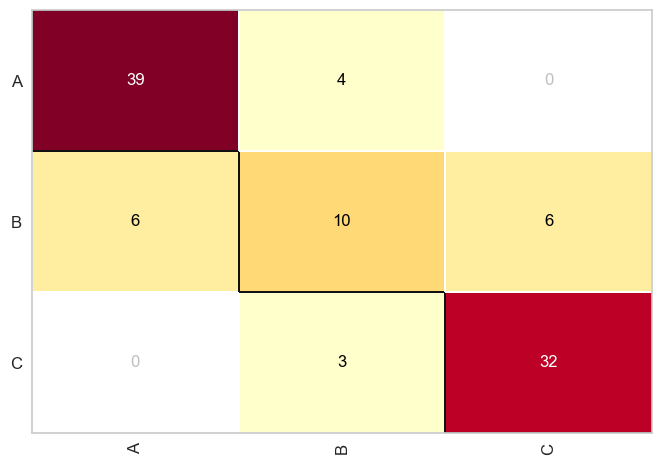

In [68]:
cm =  ConfusionMatrix(rede_neural_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [69]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.87      0.91      0.89        43
           B       0.59      0.45      0.51        22
           C       0.84      0.91      0.88        35

    accuracy                           0.81       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.80      0.81      0.80       100



## Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [74]:
x_classe_treinamento.shape, y_classe_treinamento.shape

((300, 37), (300,))

In [75]:
x_classe_teste.shape, y_classe_teste.shape

((100, 37), (100,))

In [76]:
x_classe = np.concatenate((x_classe_treinamento, x_classe_teste), axis=0)
x_classe.shape

(400, 37)

In [77]:
y_classe = np.concatenate((y_classe_treinamento, y_classe_teste), axis=0)
y_classe.shape

(400,)

### Regressão Logística

In [78]:
parametros = {
              'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0,1.5,2.0],
              'solver': ['lbfgs', 'sag', 'saga']
              }
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\pedro\anacond

{'C': 2.0, 'solver': 'saga', 'tol': 1e-06}
0.7975


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



### Random Forest

In [79]:
parametros = {
              'criterion': ['gini', 'entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]
              }
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.79


### KNN

In [80]:
parametros = {
              'n_neighbors': [3,4,5,6,7,10,20,25,30],
              'p': [1,2]
              }
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 259, in predict
    probabi

{'n_neighbors': 7, 'p': 2}
0.7775000000000001


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 259, in predict
    probabi

### SVM

In [81]:
parametros = {
              'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0,1.5,2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
              }
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'kernel': 'rbf', 'tol': 0.0001}
0.8175000000000001


### Rede Neural

In [82]:
parametros = {
              'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10,56]
              }
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Opt

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.805


## Validação Cruzada

In [83]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split=5, n_estimators = 100)
  scores = cross_val_score(random_forest, x_classe, y_classe, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier(n_neighbors=5, p=2)
  scores = cross_val_score(knn, x_classe, y_classe, cv = kfold)
  resultados_knn.append(scores.mean())
  
  logistica = LogisticRegression(C = 2.0, solver = 'saga', tol = 0.000001)
  scores = cross_val_score(logistica, x_classe, y_classe, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(C= 1.0, kernel= 'rbf', tol= 0.0001)
  scores = cross_val_score(svm, x_classe, y_classe, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 10, solver = 'adam')
  scores = cross_val_score(rede_neural, x_classe, y_classe, cv = kfold)
  resultados_rede_neural.append(scores.mean())

In [86]:
resultados = pd.DataFrame({'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Rede neural': resultados_rede_neural,
                           'logistica': resultados_logistica,
                           'SVM': resultados_svm})
resultados

,Random forest,KNN,Rede neural,logistica,SVM
0,0.7675,0.7650,0.7900,0.8125,0.8225
1,0.7625,0.7625,0.7800,0.7925,0.8100
2,0.7775,0.7650,0.7725,0.7800,0.8050
3,0.7850,0.7775,0.7725,0.7925,0.8075
4,0.7700,0.7675,0.7800,0.7775,0.8025
5,0.7875,0.7600,0.7850,0.7875,0.8125
6,0.7800,0.7800,0.7925,0.8075,0.8200
7,0.7775,0.7625,0.7900,0.7850,0.7975
8,0.7900,0.7525,0.7725,0.7875,0.8025
9,0.7750,0.7650,0.7700,0.7825,0.8200


In [87]:
resultados.describe()

,Random forest,KNN,Rede neural,logistica,SVM
count,30.000000,30.000000,30.00000,30.000000,30.000000
mean,0.777083,0.764833,0.78225,0.792500,0.808833
std,0.010527,0.010926,0.01045,0.010828,0.008426
min,0.752500,0.735000,0.76500,0.775000,0.790000
25%,0.770000,0.758125,0.77250,0.782500,0.802500
50%,0.777500,0.765000,0.78000,0.792500,0.810000
75%,0.782500,0.772500,0.79000,0.801875,0.814375
max,0.802500,0.782500,0.80750,0.812500,0.822500


In [88]:
resultados.var()

Random forest    0.000111
KNN              0.000119
Rede neural      0.000109
logistica        0.000117
SVM              0.000071
dtype: float64

In [89]:
(resultados.std() / resultados.mean()) * 100

Random forest    1.354645
KNN              1.428489
Rede neural      1.335891
logistica        1.366285
SVM              1.041808
dtype: float64